In [31]:
from utils import open_csv_file, append_rows_dataframes, create_csv_file
from data import DataFrame
from correlation_matrix import Correlation


In [32]:
training_data = open_csv_file('train.csv')
testing_data = open_csv_file('test.csv')

df = append_rows_dataframes(testing_data, training_data)


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5254 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5254 non-null   int64  
 1   Gender           5254 non-null   object 
 2   Ever_Married     5154 non-null   object 
 3   Age              5254 non-null   int64  
 4   Graduated        5206 non-null   object 
 5   Profession       5178 non-null   object 
 6   Work_Experience  4716 non-null   float64
 7   Spending_Score   5254 non-null   object 
 8   Family_Size      5028 non-null   float64
 9   Var_1            5190 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 451.5+ KB


id - unique value
gender - male/female 
ever_married - yes/no/null 
age - int
graduate yes/no/null
profession - healthcare/engineer/lawyer/etc
work experience - 0 to 14
spending_score low/average/high 
family_size 1 to 9
var_1 - cat_6/cat_4 

In [34]:
data_frame_instance = DataFrame(df)

In [35]:
data_frame_instance.check_missing_data()

ID                   0
Gender               0
Ever_Married       100
Age                  0
Graduated           48
Profession          76
Work_Experience    538
Spending_Score       0
Family_Size        226
Var_1               64
dtype: int64

need to handle missing values before encoding because it will handle the missing value for me 

ever married - mode
graduated - mode
Profession - mode

work experience - can you predicted using graduated, age and professon
family size - can oyu use ever married and aged to predict family size... but does ever married need to be no null first ?
var 1 

In [36]:
import pandas as pd

x = data_frame_instance.get_df()[['Ever_Married', 'Graduated', 'Profession']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
transformed_data = imputer.fit_transform(x)

transformed_df = pd.DataFrame(transformed_data, columns=['Ever_Married', 'Graduated', 'Profession'])
transformed_df

,Ever_Married,Graduated,Profession
0,Yes,Yes,Engineer
1,Yes,Yes,Healthcare
2,Yes,No,Artist
3,Yes,No,Executive
4,No,No,Marketing
...,...,...,...
5249,No,No,Healthcare
5250,No,Yes,Doctor
5251,No,Yes,Entertainment
5252,Yes,Yes,Executive


family size has a strong correlation with age and graduate so would be a good one to use to predict the family size

In [37]:
data_frame_instance.hot_encoding('Graduated')


In [38]:
data_frame_instance.get_df()

,ID,Gender,Ever_Married,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Graduated_No,Graduated_Yes,Graduated_nan
0,458989,Female,Yes,36,Engineer,0.0,Low,1.0,Cat_6,0.0,1.0,0.0
1,458994,Male,Yes,37,Healthcare,8.0,Average,4.0,Cat_6,0.0,1.0,0.0
2,458996,Female,Yes,69,NaN,0.0,Low,1.0,Cat_6,1.0,0.0,0.0
3,459000,Male,Yes,59,Executive,11.0,High,2.0,Cat_6,1.0,0.0,0.0
4,459001,Female,No,19,Marketing,NaN,Low,4.0,Cat_6,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5249,467954,Male,No,29,Healthcare,9.0,Low,4.0,Cat_6,1.0,0.0,0.0
5250,467958,Female,No,35,Doctor,1.0,Low,1.0,Cat_6,0.0,1.0,0.0
5251,467960,Female,No,53,Entertainment,NaN,Low,2.0,Cat_6,0.0,1.0,0.0
5252,467961,Male,Yes,47,Executive,1.0,High,5.0,Cat_4,0.0,1.0,0.0


In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
y = data_frame_instance.get_df()[['Family_Size', 'Age', 'Graduated_No', 'Graduated_Yes', 'Graduated_nan']]

transformed_data = impute_it.fit_transform(y)
transformed_df = pd.DataFrame(transformed_data, columns=['Family_Size', 'Age', 'Graduated_No', 'Graduated_Yes', 'Graduated_nan'])
transformed_df

,Family_Size,Age,Graduated_No,Graduated_Yes,Graduated_nan
0,1.0,36.0,0.0,1.0,0.0
1,4.0,37.0,0.0,1.0,0.0
2,1.0,69.0,1.0,0.0,0.0
3,2.0,59.0,1.0,0.0,0.0
4,4.0,19.0,1.0,0.0,0.0
...,...,...,...,...,...
5249,4.0,29.0,1.0,0.0,0.0
5250,1.0,35.0,0.0,1.0,0.0
5251,2.0,53.0,0.0,1.0,0.0
5252,5.0,47.0,0.0,1.0,0.0


In [40]:
null_counts = data_frame_instance.get_df().isnull().sum(axis=1)
null_counts

0       0
1       0
2       1
3       0
4       1
       ..
5249    0
5250    0
5251    1
5252    0
5253    0
Length: 5254, dtype: int64

In [41]:
data_frame_instance.remove_rows_with_more_than_three_features_missing()

In [42]:
data_frame_instance.get_df()

,ID,Gender,Ever_Married,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Graduated_No,Graduated_Yes,Graduated_nan
0,458989,Female,Yes,36,Engineer,0.0,Low,1.0,Cat_6,0.0,1.0,0.0
1,458994,Male,Yes,37,Healthcare,8.0,Average,4.0,Cat_6,0.0,1.0,0.0
2,458996,Female,Yes,69,NaN,0.0,Low,1.0,Cat_6,1.0,0.0,0.0
3,459000,Male,Yes,59,Executive,11.0,High,2.0,Cat_6,1.0,0.0,0.0
4,459001,Female,No,19,Marketing,NaN,Low,4.0,Cat_6,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5249,467954,Male,No,29,Healthcare,9.0,Low,4.0,Cat_6,1.0,0.0,0.0
5250,467958,Female,No,35,Doctor,1.0,Low,1.0,Cat_6,0.0,1.0,0.0
5251,467960,Female,No,53,Entertainment,NaN,Low,2.0,Cat_6,0.0,1.0,0.0
5252,467961,Male,Yes,47,Executive,1.0,High,5.0,Cat_4,0.0,1.0,0.0


gender - hot encoding
ever_married - hot encoding
graduated - hot endcoding 
spending score - hot endcoding 

profession - label encoding
var_1 - label encoding

because profession and var_1 could result in a lot of columns so will affect compute time

In [43]:
data_frame_instance.label_encoding('Profession')
data_frame_instance.label_encoding('Var_1')

# data_frame_instance.hot_encoding('Gender')
# data_frame_instance.hot_encoding('Ever_Married')
# data_frame_instance.hot_encoding('Graduated')
# data_frame_instance.hot_encoding('Spending_Score')

In [44]:
data_frame_instance.hot_encoding('Gender')
data_frame_instance.hot_encoding('Ever_Married')
# data_frame_instance.hot_encoding('Graduated')
data_frame_instance.hot_encoding('Spending_Score')

In [45]:
data_frame_instance.remove_columns(['ID'])

In [46]:
data_frame_instance.get_df()

,Age,Profession,Work_Experience,Family_Size,Var_1,Graduated_No,Graduated_Yes,Graduated_nan,Profession_encoded,Var_1_encoded,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Ever_Married_nan,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,36,Engineer,0.0,1.0,Cat_6,0.0,1.0,0.0,2,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,37,Healthcare,8.0,4.0,Cat_6,0.0,1.0,0.0,5,5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,69,NaN,0.0,1.0,Cat_6,1.0,0.0,0.0,9,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,59,Executive,11.0,2.0,Cat_6,1.0,0.0,0.0,4,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,19,Marketing,NaN,4.0,Cat_6,1.0,0.0,0.0,8,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,29,Healthcare,9.0,4.0,Cat_6,1.0,0.0,0.0,5,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5240,35,Doctor,1.0,1.0,Cat_6,0.0,1.0,0.0,1,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5241,53,Entertainment,NaN,2.0,Cat_6,0.0,1.0,0.0,3,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5242,47,Executive,1.0,5.0,Cat_4,0.0,1.0,0.0,4,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_94268/3902048750.py:7: UserWarning: 
The palette list has fewer values (5) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data= data_frame_instance.get_df(), palette=colors)


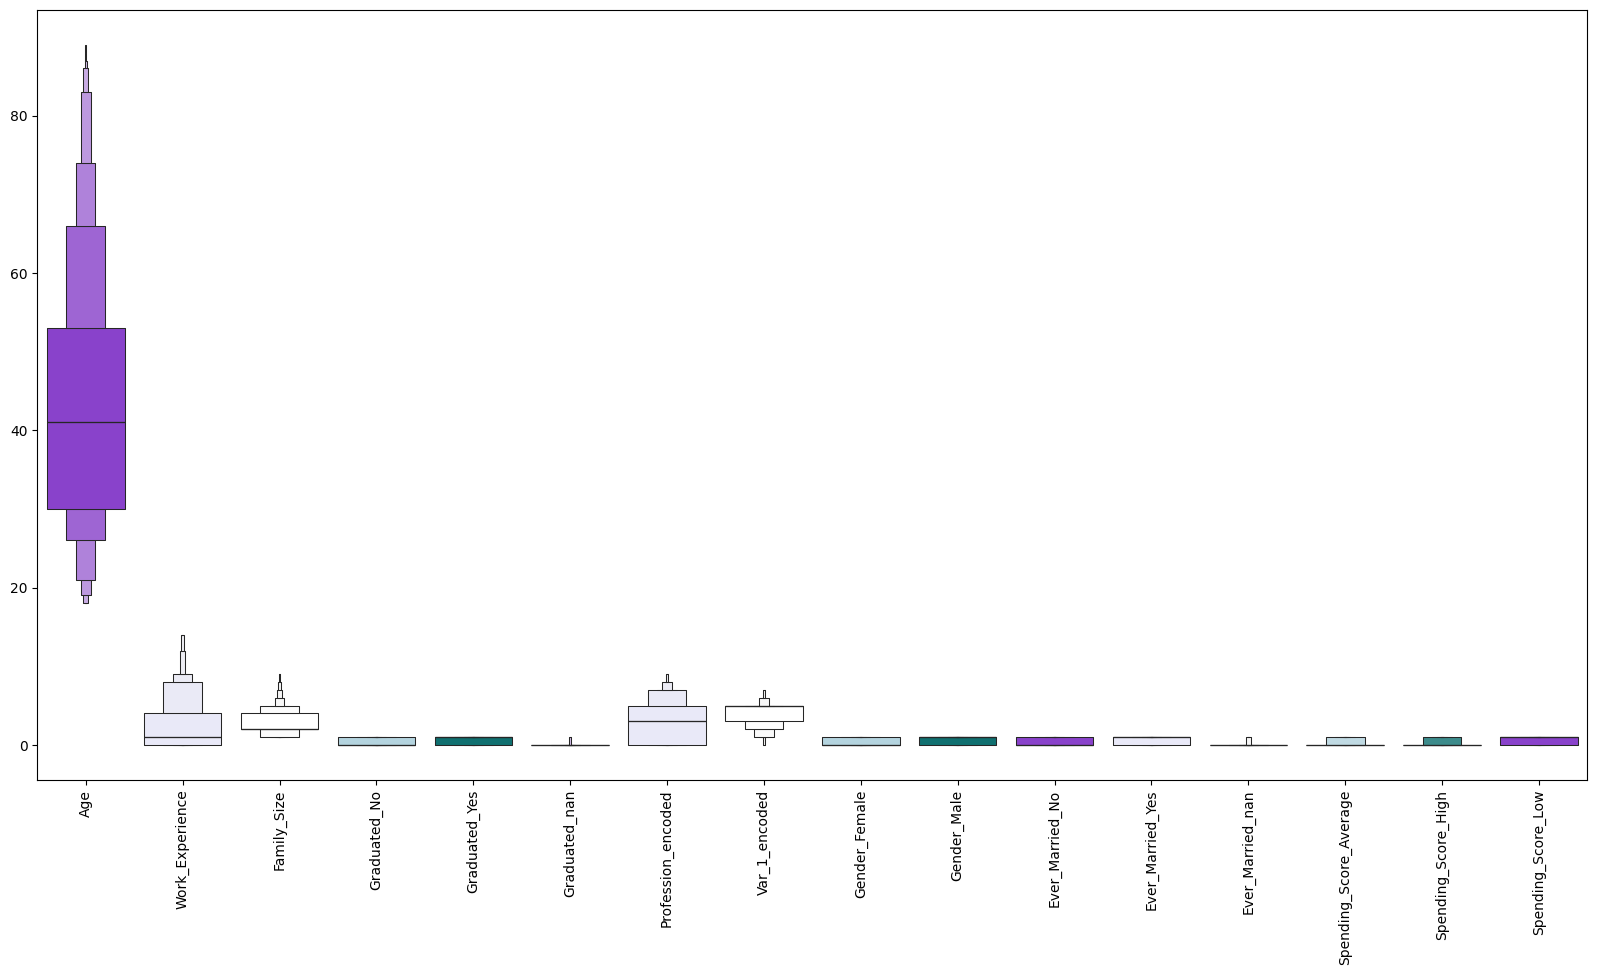

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns


colors = ["#8a2be2", "#e6e6fa", "#ffffff", "#add8e6", "#008080"]
plt.figure(figsize=(20,10))
sns.boxenplot(data= data_frame_instance.get_df(), palette=colors)
plt.xticks(rotation=90)
plt.show()

In [48]:
data_frame_instance.get_df()

,Age,Profession,Work_Experience,Family_Size,Var_1,Graduated_No,Graduated_Yes,Graduated_nan,Profession_encoded,Var_1_encoded,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Ever_Married_nan,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,36,Engineer,0.0,1.0,Cat_6,0.0,1.0,0.0,2,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,37,Healthcare,8.0,4.0,Cat_6,0.0,1.0,0.0,5,5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,69,NaN,0.0,1.0,Cat_6,1.0,0.0,0.0,9,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,59,Executive,11.0,2.0,Cat_6,1.0,0.0,0.0,4,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,19,Marketing,NaN,4.0,Cat_6,1.0,0.0,0.0,8,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,29,Healthcare,9.0,4.0,Cat_6,1.0,0.0,0.0,5,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5240,35,Doctor,1.0,1.0,Cat_6,0.0,1.0,0.0,1,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5241,53,Entertainment,NaN,2.0,Cat_6,0.0,1.0,0.0,3,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5242,47,Executive,1.0,5.0,Cat_4,0.0,1.0,0.0,4,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


<Axes: >

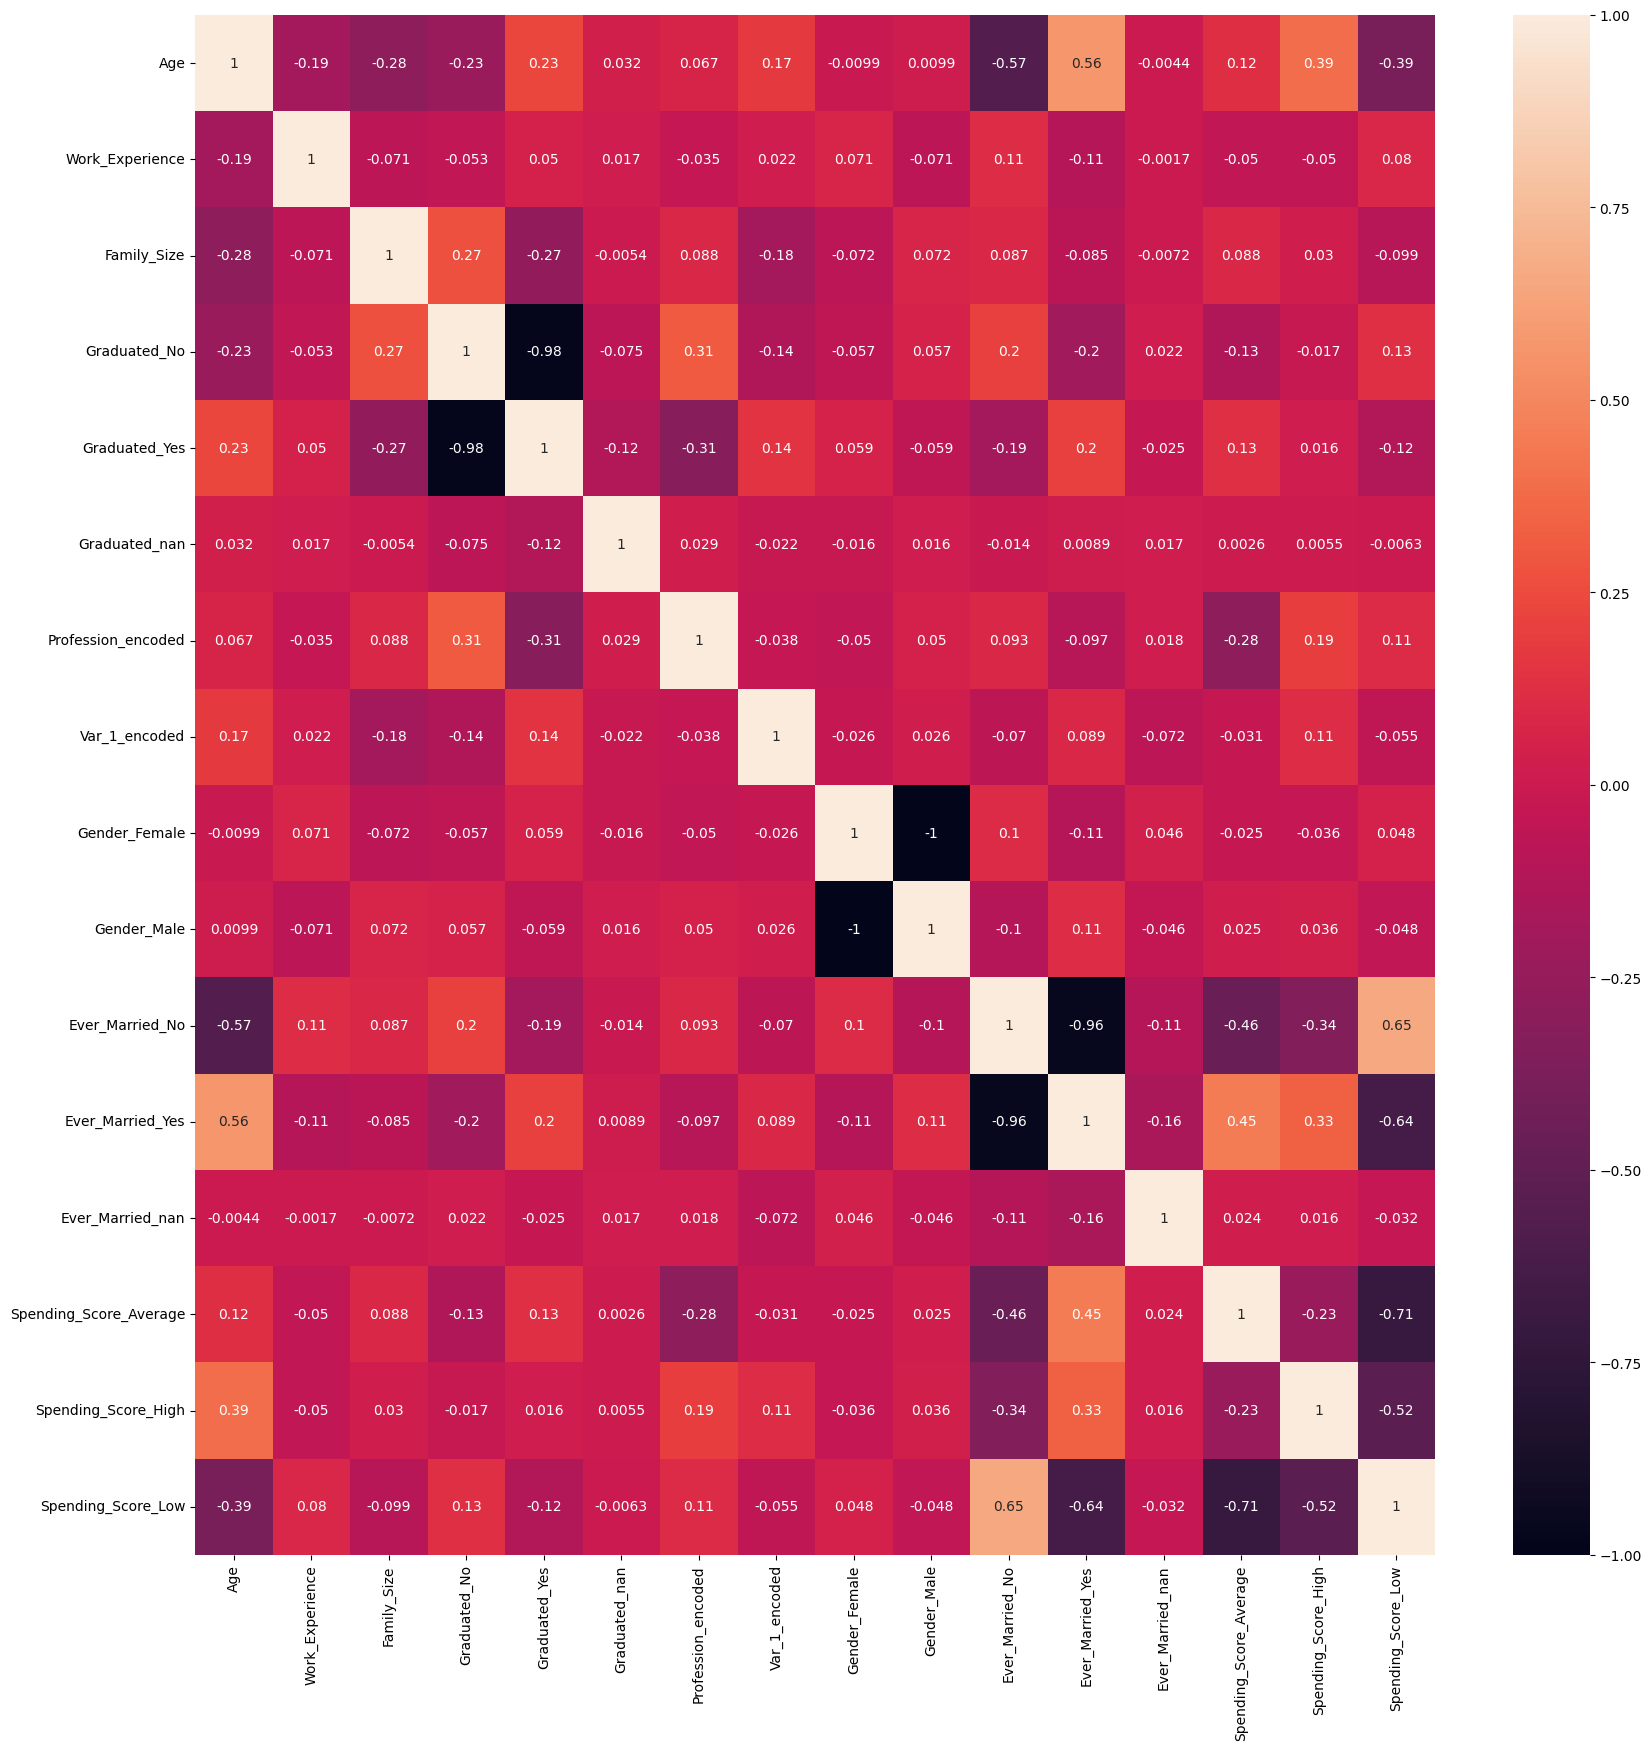

In [49]:
correlation_instance = Correlation(data_frame_instance.get_df())
# correlation_instance.show_column_desc_order('Work_Experience')
correlation_instance.create_correlation_matrix()

In [50]:
data_frame_instance.remove_columns(['Profession', 'Var_1'])

In [51]:
data_frame_instance.check_missing_data()

Age                         0
Work_Experience           530
Family_Size               218
Graduated_No                0
Graduated_Yes               0
Graduated_nan               0
Profession_encoded          0
Var_1_encoded               0
Gender_Female               0
Gender_Male                 0
Ever_Married_No             0
Ever_Married_Yes            0
Ever_Married_nan            0
Spending_Score_Average      0
Spending_Score_High         0
Spending_Score_Low          0
dtype: int64

In [52]:
data_frame_instance.get_df()

,Age,Work_Experience,Family_Size,Graduated_No,Graduated_Yes,Graduated_nan,Profession_encoded,Var_1_encoded,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Ever_Married_nan,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,36,0.0,1.0,0.0,1.0,0.0,2,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,37,8.0,4.0,0.0,1.0,0.0,5,5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,69,0.0,1.0,1.0,0.0,0.0,9,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,59,11.0,2.0,1.0,0.0,0.0,4,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,19,NaN,4.0,1.0,0.0,0.0,8,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,29,9.0,4.0,1.0,0.0,0.0,5,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5240,35,1.0,1.0,0.0,1.0,0.0,1,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5241,53,NaN,2.0,0.0,1.0,0.0,3,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5242,47,1.0,5.0,0.0,1.0,0.0,4,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [53]:
data_frame_instance.bucket_quantile('Age')

In [54]:
data_frame_instance.get_df()
data_frame_instance.remove_columns('Age')

i replace the work experience and family size with the mean because there are no outliers

In [55]:
data_frame_instance.get_df()
data_frame_instance.replace_with_mean('Work_Experience')
data_frame_instance.replace_with_mean('Family_Size')

In [56]:
data_frame_instance.get_df().reset_index(inplace=True, drop=True)
data_frame_instance.get_df()

,Work_Experience,Family_Size,Graduated_No,Graduated_Yes,Graduated_nan,Profession_encoded,Var_1_encoded,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Ever_Married_nan,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Age_bucket
0,0.000000,1.0,0.0,1.0,0.0,2,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,8.000000,4.0,0.0,1.0,0.0,5,5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
2,0.000000,1.0,1.0,0.0,0.0,9,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0
3,11.000000,2.0,1.0,0.0,0.0,4,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0
4,2.553246,4.0,1.0,0.0,0.0,8,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,9.000000,4.0,1.0,0.0,0.0,5,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5240,1.000000,1.0,0.0,1.0,0.0,1,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5241,2.553246,2.0,0.0,1.0,0.0,3,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
5242,1.000000,5.0,0.0,1.0,0.0,4,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0


In [57]:
# create_csv_file(data_frame_instance.get_df(), 'data.csv')

/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_94268/3902048750.py:7: UserWarning: 
The palette list has fewer values (5) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data= data_frame_instance.get_df(), palette=colors)


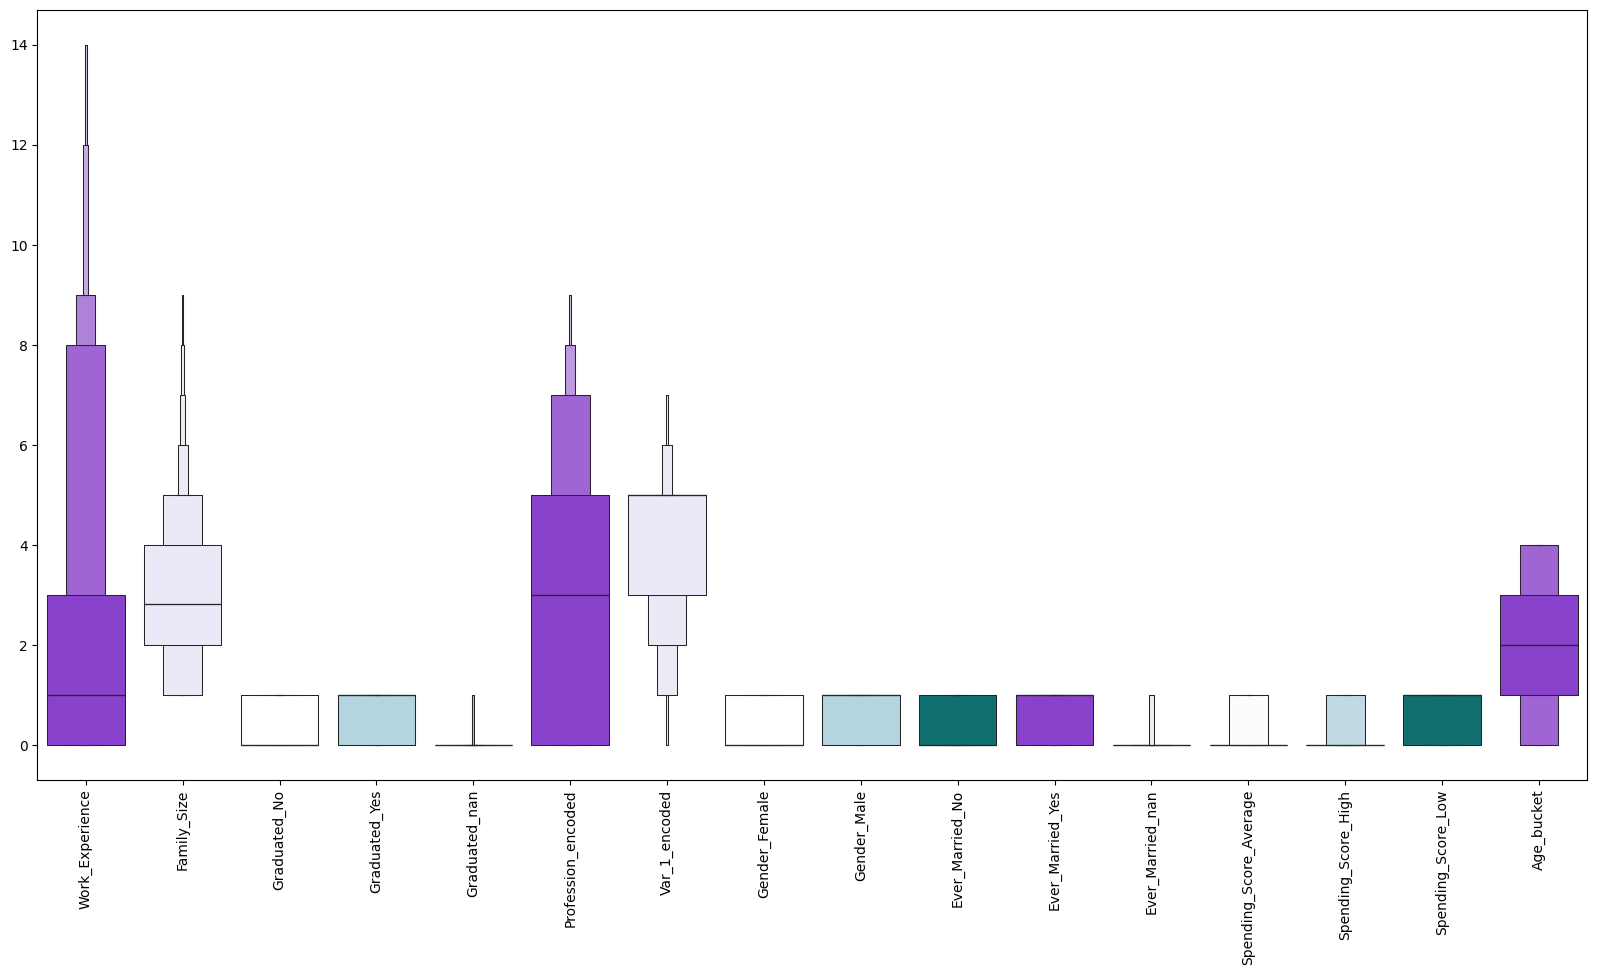

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns


colors = ["#8a2be2", "#e6e6fa", "#ffffff", "#add8e6", "#008080"]
plt.figure(figsize=(20,10))
sns.boxenplot(data= data_frame_instance.get_df(), palette=colors)
plt.xticks(rotation=90)
plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = ['Age_bucket','Profession_encoded','Work_Experience','Family_Size','Var_1_encoded']

data_frame_instance.get_df()[columns_to_normalize] = scaler.fit_transform(data_frame_instance.get_df()[columns_to_normalize])

In [60]:
create_csv_file(data_frame_instance.get_df(), 'data.csv')